# Logistic Regression

### Import Relevant Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Import Iris Dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

Select petal width as feature dataset (X) and output y # 1 if Iris virginica, else 0

In [3]:
X_petal_width = X[:, 3]  # Petal width
y_virginica = (y == 2)   # 1 if Iris virginica, else 0

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_petal_width, y_virginica, test_size=0.2, random_state=42)

## Import Logistic Regression from sklearn and train

Set solver="lbfgs" and random_state=42

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs", random_state=42)
model.fit(X_train.reshape(-1, 1), y_train)

LogisticRegression(random_state=42)

In [6]:
print(model.classes_) # Number of classes
print(model.intercept_) # Intercept in x axis
print(model.coef_) # Slope

[False  True]
[-6.48790083]
[[3.91490936]]


Use linspace to create a data set from 0 to 3 with 1000 points

Predict using this new data

Plot both probability (Y[:, 0], Y[:, 1]) the first blue with dashes and the second as a green continous line

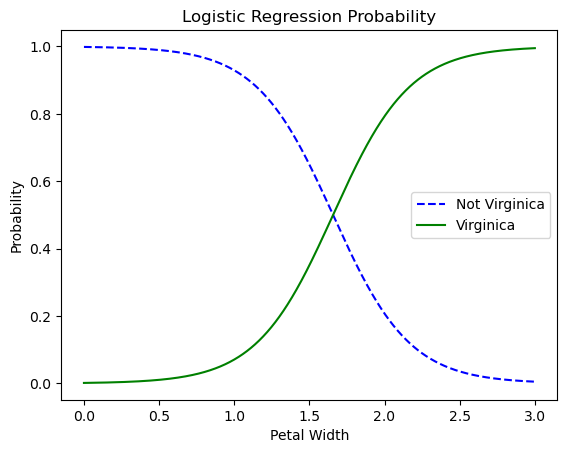

In [8]:
# linspace to create a dataset & reshape
new_data = np.linspace(0, 3, 1000).reshape(-1, 1)

# Predict using the new data
predicted_probabilities = model.predict_proba(new_data)

# Plot both probability (Y[:, 0], Y[:, 1])
plt.plot(new_data, predicted_probabilities[:, 0], 'b--', label='Not Virginica')
plt.plot(new_data, predicted_probabilities[:, 1], 'g-', label='Virginica')
plt.xlabel('Petal Width')
plt.ylabel('Probability')
plt.legend()
plt.title('Logistic Regression Probability')
plt.show()

Calculate the decision boundry (x value) if the threshold is set at y[:, 1] > 0.5

In [9]:
# Calculate the decision boundary (x value) if the threshold is set at y[:, 1] > 0.5
decision_boundary = new_data[np.argmax(predicted_probabilities[:, 1] > 0.5)]

print("Decision Boundary:", decision_boundary)

Decision Boundary: [1.65765766]


Predict a new data point [1.7, 1.5]

In [12]:
# Predict a new data point [1.7, 1.5]
new_data_point = np.array([[1.7]])
predicted_class = model.predict(new_data_point)
predicted_probability = model.predict_proba(new_data_point)

print("Predicted Class:", predicted_class)
print("Predicted Probability:", predicted_probability)

Predicted Class: [ True]
Predicted Probability: [[0.45823626 0.54176374]]


## Softmax Regression

Train the Logistic regression now with softmax 

Use now petal length, petal width as feature dataset(X)

Use solver="lbfgs", C=10**10, random_state=42

In [13]:
# Select petal length and petal width as feature dataset (X)
X_petal_features = X[:, 2:]  # Petal length and petal width

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_petal_features, y, test_size=0.2, random_state=42)

# Train the logistic regression model with softmax
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10**10, random_state=42)
softmax_model.fit(X_train, y_train)

# Predict a new data point [1.7, 1.5]
new_data_point = np.array([[1.7, 1.5]])
predicted_class = softmax_model.predict(new_data_point)
predicted_probabilities = softmax_model.predict_proba(new_data_point)

print("Predicted Class:", predicted_class)
print("Predicted Probabilities:", predicted_probabilities)

Predicted Class: [1]
Predicted Probabilities: [[5.58464528e-04 9.99441523e-01 1.20017177e-08]]


Predict new data

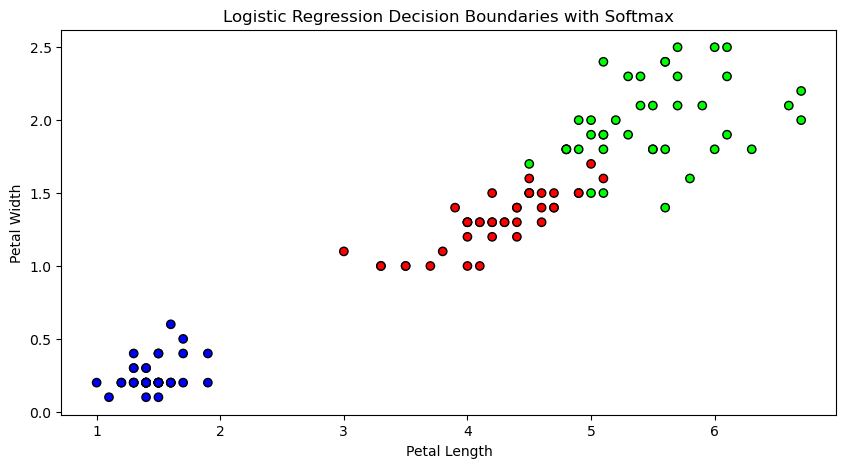

In [18]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]

# Predict probabilities for the new data points
y_proba = softmax_model.predict_proba(X_new)

# Plot the decision boundaries and the probabilities
plt.figure(figsize=(10, 5))

# Plot the data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, edgecolors='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Logistic Regression Decision Boundaries with Softmax')
plt.show()

Plot y==0 as "bs" and y==1 as "g^"

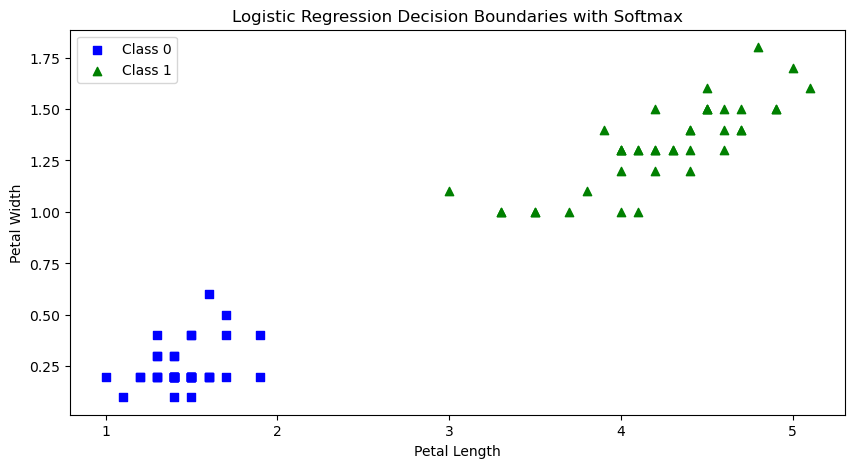

In [20]:
# Plot the decision boundaries and the probabilities
plt.figure(figsize=(10, 5))

# Plot the data points for different classes
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], marker='s', c='blue', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='^', c='green', label='Class 1')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Logistic Regression Decision Boundaries with Softmax')
plt.legend()
plt.show()

Train multiclass Logistic Regression

Use now petal length, petal width as feature dataset(X)

Use now the iris target (all the classes) as output(y)

Use multi_class="multinomial",solver="lbfgs", C=10, random_state=42

In [22]:
# Select petal length and petal width as feature dataset (X)
X_petal_features = X[:, 2:]  # Petal length and petal width

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_petal_features, y, test_size=0.2, random_state=42)

# Train the multiclass logistic regression model
multiclass_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=42)
multiclass_model.fit(X_train, y_train)

# Predict a new data point [1.7, 1.5]
new_data_point = np.array([[1.7, 1.5]])
predicted_class = multiclass_model.predict(new_data_point)
predicted_probabilities = multiclass_model.predict_proba(new_data_point)

print("Predicted Class:", predicted_class)
print("Predicted Probabilities:", predicted_probabilities)

Predicted Class: [0]
Predicted Probabilities: [[9.81332641e-01 1.86673366e-02 2.27057400e-08]]


Calculate the probability and the prediction of the new data set 

In [23]:
# Create a meshgrid of new data points
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

# Calculate the probabilities for the new dataset
predicted_probabilities = multiclass_model.predict_proba(X_new)

# Make predictions for the new dataset
predicted_classes = multiclass_model.predict(X_new)

print("Predicted Probabilities:")
print(predicted_probabilities)
print("\nPredicted Classes:")
print(predicted_classes)


Predicted Probabilities:
[[9.99994040e-01 5.95952554e-06 1.05836115e-18]
 [9.99993589e-01 6.41138810e-06 1.21430201e-18]
 [9.99993102e-01 6.89751151e-06 1.39321944e-18]
 ...
 [8.93926983e-22 6.67458535e-11 1.00000000e+00]
 [7.79128381e-22 6.25852292e-11 1.00000000e+00]
 [6.79072280e-22 5.86839588e-11 1.00000000e+00]]

Predicted Classes:
[0 0 0 ... 2 2 2]


Plot the new dataset y==2 as "g^", y==1 as "bs", and y==0 as "yo"

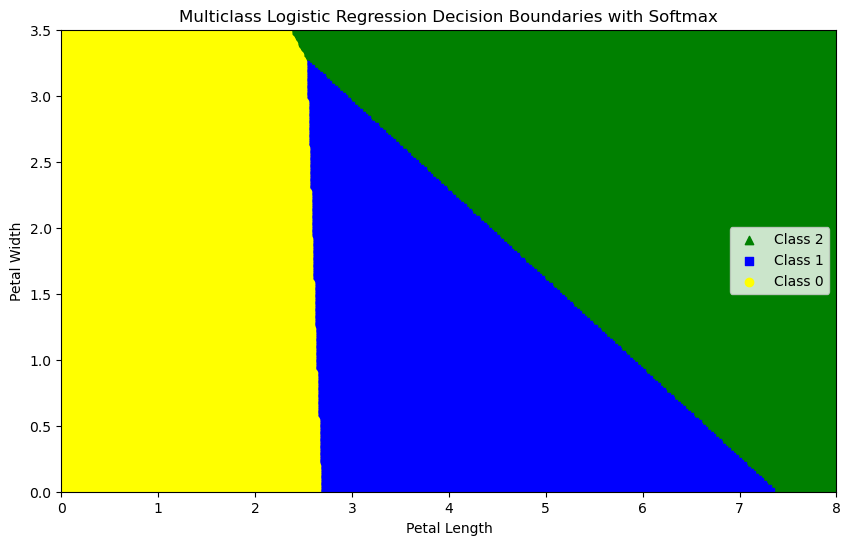

In [25]:
# Plot the decision boundaries and the new dataset
plt.figure(figsize=(10, 6))

# Plot the decision boundaries
for class_idx in range(multiclass_model.classes_.shape[0]):
    plt.contourf(x0, x1, predicted_probabilities[:, class_idx].reshape(x0.shape), cmap=plt.cm.brg, alpha=0.2)

# Plot the data points for different classes
plt.scatter(X_new[predicted_classes == 2, 0], X_new[predicted_classes == 2, 1], marker='^', c='green', label='Class 2')
plt.scatter(X_new[predicted_classes == 1, 0], X_new[predicted_classes == 1, 1], marker='s', c='blue', label='Class 1')
plt.scatter(X_new[predicted_classes == 0, 0], X_new[predicted_classes == 0, 1], marker='o', c='yellow', label='Class 0')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Multiclass Logistic Regression Decision Boundaries with Softmax')
plt.legend()
plt.show()

Predict a new point [5, 2]

In [27]:
# Predict a new data point [5, 2]
new_data_point = np.array([[5, 2]])
predicted_class = multiclass_model.predict(new_data_point)
predicted_probabilities = multiclass_model.predict_proba(new_data_point)

print("Predicted Class:", predicted_class)
print("Predicted Probabilities:", predicted_probabilities)

Predicted Class: [2]
Predicted Probabilities: [[9.56858586e-07 6.91250086e-02 9.30874035e-01]]


Show the probability of the new data point [5, 2]

In [28]:
# Predict a new data point [5, 2]
new_data_point = np.array([[5, 2]])
predicted_probabilities = multiclass_model.predict_proba(new_data_point)

print("Predicted Probabilities:", predicted_probabilities)


Predicted Probabilities: [[9.56858586e-07 6.91250086e-02 9.30874035e-01]]
